In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
from numpy.random import normal
import scipy
import math
from matplotlib import animation
import seaborn as sb
plt.style.use('ggplot')


In [2]:
# Initial conditions for Case 1 and exact solution
dir0 = 0.0  # u(-L,t)= dir0
dir1 = 0.0  # u(L,t)= dir1

# function for setting initial conditions in space
def I(x): # initial u(x,0)
    result = []
    len_x = np.size(x)
    i_x = np.zeros(len_x)
    for x_i in x:
        i_x = norm.pdf(x_i, 0, 1/(2**2))
        result.append(i_x)
    return result


#Note - I'm assuming D=1
def U_exact(x,t):
    M = np.size(x)
    u_ex = np.zeros(M)
    if t == 0:
        u_ex = norm.pdf(x,0,1/(2**2))
    else:
        y = x - v*t
        u_ex = np.exp(-y**2/(4*t))/np.sqrt(4*np.pi*t)
        u_ex[0] = dir0
        u_ex[M-1] = dir1
    return u_ex

## Using the normally distributed wind speeds

In [3]:
# Defining the wind speed function
#def wind_speed(shape, scale):
    # using a weibull with parameter k as an example, we can change it when we have data
#    return np.random.weibull(shape)*scale


# setting the distributions to be equal to those given in the wind_distribution file.
x_mean = 2.0046153468353722
x_std = 2.168835495560843

y_mean = 1.0209864186943514*np.exp(-16)
y_std = 2.901290755064771
#
# x_mean *= 100
# x_std *= 100
# y_mean *= 100
# y_std *= 100

def wind_speed(mean, std):
    # using a weibull with parameter k as an example, we can change it when we have data
    return normal(loc = mean, scale = std)

In [4]:
## ====== setting parameters =======
Nt_gaps = 2**12  # number of timesteps
L = 2**5 # final distance
T = 1  # final time 
Nt_points = Nt_gaps + 1
h = T/(Nt_points)  # time step

t = np.linspace(0.,T,Nt_points)  # times at each time step
Nx_spaces = 2**8; # number of spaces in x direction

Nx_points = Nx_spaces + 1 
x_pde = np.linspace(-L, L, Nx_points)    # mesh points in space
dx = x_pde[1] - x_pde[0]
dt = t[1] - t[0]

# Setting B, C and v for the numerical soultions
C = dt/(dx**2)
v = 15
B = v*dt/(2*dx)
print("Delta x =", dx, "Delta t = ", dt, "C =", C)


##----------intialise lists ------------------------
# Define the numerical solution 
# the first index is space and the second time
U = np.zeros((Nx_points,Nt_points))

# The initial condition
U[:,0]=I(x_pde)
# enforcing the boundary condition
U[-L,:]  = dir0 
U[L,:] = dir1

Delta x = 0.25 Delta t =  0.000244140625 C = 0.00390625


In [5]:
x_ex = np.linspace(-L, L, Nx_points)
def plotting(U,L,type):
    size_t = np.size(U,1)-1 # number of time steps
   
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    markers =['X','.','+','o']

    colours = ['r','g','b','purple','yellow'] # make comparison easy
    colours1 = ['b','purple','yellow','r','g',]
    colour_pos = 0;



# some arbitarily chosen time points to compare at
    for plot_pos in [0, int(size_t/10),int(size_t/5), int(size_t/2), int(size_t)]:
        if type == "exact":
            U_tplot = U_exact(x_ex,t[plot_pos])
            label = "Exact, t=" + "%0.3f" % (t[plot_pos],)
            ax.plot(x_ex,U_tplot,linestyle = ':',color = colours[colour_pos],marker = ".",markersize = 1, label=label)
            colour_pos = colour_pos + 1;
    # numerical solution
        else:
            label = "Numerical PDE, t=" + "%0.3f" % (t[plot_pos],)
            ax.plot(x_pde,U[:,plot_pos],color = colours[colour_pos],ls='--', label=label)
            colour_pos = colour_pos + 1;

    plt.xlim(-L,L) # zoom in on area of interest
    ax.legend() # turn on legend 
    plt.show()

In [6]:
# u_old = I(x_pde)
#
# u = np.zeros(Nx_points)
# # and to store the full solution
# U = np.zeros((Nx_points,Nt_points))
# U[:,0] = u_old
# for n in range(1, Nt_points):
#     # set Dirichlet boundary points here
#     #...
#     # compute u at inner mesh points
#     for i in range(1, Nx_points-1):
#         u[i] = (1-2*C)*u_old[i] + (C+B)*(u_old[i-1]) + (C-B)*(u_old[i+1])
#
#     # update u_old before next step
#     u_old[:]= u
#
#     # copy into full storage
#     U[:,n] = u;
# print(U.shape)
# plotting(U,L, "exact")
# plotting(U,L, "numerical")

In [7]:
#Note - I'm assuming D=1
#def U_exact(x,t):
#    M = np.size(x)
#    u_ex = np.zeros(M)
#    for x_i in x:
#        if t == 0:
#            x_i = norm.pdf(x[i], 0, 1/(2**12))
#    else:
#        x_i = 1/(2*np.pi*t)*np.exp(-x**2/(4*t))
#    return u_ex

# Extending to 2D

In [103]:
# ====== setting parameters =======
Nt_gaps = int(2**14)  # number of timesteps
Lx = 100000  # final distance in x
Ly = 100000  # final distance in y
T = 100000 # final time
Nt_points = Nt_gaps + 1
h = T/(Nt_points)  # time step

t = np.linspace(0.,T,Nt_points)  # times at each time step
Nx_spaces = 100; # number of spaces in x direction
Ny_spaces = Nx_spaces
Nx_points = Nx_spaces + 1
Ny_points = Ny_spaces + 1

x_pde = np.linspace(-Lx, Ly, Nx_points)
y_pde = np.linspace(-Lx, Ly, Ny_points)

dx = x_pde[1] - x_pde[0]
dy = y_pde[1] - x_pde[0]
dt = t[1] - t[0]

# Setting B, C and v for the numerical soultions
D = 0.208/10000
C = D*dt/(dx**2)
#vx = 5
#vy = 5
#Bx = vx*dt/(2*dx)
#By = vy*dt/(2*dx)
print("Delta x =", dx, "Delta t = ", dt, "C =", C)
print(x_mean)

Delta x = 2000.0 Delta t =  6.103515625 C = 3.1738281249999993e-11
2.0046153468353722


# Trying a UPFD method

In [9]:
D_hat = D/dx**2


In [99]:
def calculate_upfd(u):
    nk, ni, nj = u.shape
    print(nk-1)
    vx, vy = wind_speed(x_mean, x_std), wind_speed(y_mean, y_std)
    vx_hat, vy_hat = -vx/dx, -vy/dx
    Fx = 1/dt + vx_hat + 2*D_hat
    Fy = 1/dt + vy_hat + 2*D_hat
    for k in range(0, nk -1):
        if k % 1000 ==0:
            print(k)
        if k*dt*60 % 2 == 0:
            vx, vy = wind_speed(x_mean, x_std), wind_speed(y_mean, y_std)
            vx_hat, vy_hat = vx/dx, vy/dx
            Fx = 1/dt + vx_hat + 2*D_hat
            Fy = 1/dt + vy_hat + 2*D_hat
        if vx >= 0:
            vx_hat_1 = vx_hat
            vx_hat_2 = 0
        else:
            vx_hat_1 = 0
            vx_hat_2 = vx_hat
        if vy >= 0:
            vy_hat_1 = vy_hat
            vy_hat_2 = 0
        else:
            vy_hat_1 = 0
            vy_hat_2 = vy_hat
        local_maps = np.lib.stride_tricks.sliding_window_view(u[k], (3,3))
        kernel = np.array([
            [0, (vx_hat + D_hat)/Fx, 0],
            [(vy_hat_1 + D_hat)/Fy, 1/Fx*dt + 1/Fy*dt, (D_hat+vy_hat_2)/Fy],
            [0, (D_hat+vx_hat_2)/Fx, 0]])

        #print(kernel)
        # sum the product of the kernel and each map
        # and sum each local map
        result = np.sum(kernel * local_maps, axis=(2,3))
        u[k+1, 1:-1, 1:-1] = result
    return u


In [104]:
# Note - how do we justify choice of covariance?
dist = multivariate_normal(mean=[0,0], cov=[[1/10,0],[0,1/10]])

# function for setting initial conditions in 2D space
def I(x, y): # initial u(x,0):
    result = np.zeros((Nx_points, Ny_points))
    i = 0
    for x_i in x:
        j = 0
        for y_i in y:
            xy = dist.pdf([x_i,y_i])
            result[i][j] = xy
            j +=1
        i +=1
    return result

In [140]:
def calculate(u, x_mean, y_mean):
    nk, ni, nj = u.shape
    print(nk-1)
    Bx = wind_speed(x_mean, x_std)*dt/(2*dx)
    By = wind_speed(y_mean, y_std)*dt/(2*dx)
    if Bx >= 0:
        Bx1 = 0
        Bx2 = -Bx
        Bx3 = Bx
    else:
        Bx1 = -Bx
        Bx2 = Bx
        Bx3 = 0

    if By >= 0:
        By1 = 0
        By2 = -By
        By3 = By
    else:
        By1 = -By
        By2 = By
        By3 = 0
    for k in range(0, nk -1):
        local_maps = np.lib.stride_tricks.sliding_window_view(u[k], (3,3))
        if k % 1000 ==0:
            print(k)
        Bx = wind_speed(x_mean, x_std)*dt/(2*dx)
        By = wind_speed(y_mean, y_std)*dt/(2*dx)
        if Bx >= 0:
            Bx1 = 0
            Bx2 = -Bx
            Bx3 = Bx
        else:
            Bx1 = -Bx
            Bx2 = Bx
            Bx3 = 0
        if By >= 0:
            By1 = 0
            By2 = -By
            By3 = By
        else:
            By1 = -By
            By2 = By
            By3 = 0
        kernel = np.array([
            [0, C+Bx1, 0],
            [C+By1, 1-(4*C)+Bx2+By2, C+By3],
            [0, C+Bx3, 0]])
        # sum the product of the kernel and each map
        # and sum each local map
        result = np.sum(kernel * local_maps, axis=(2,3))
        u[k+1, 1:-1, 1:-1] = result
    return u

In [119]:
U =  np.zeros((Nt_points,Nx_points,Ny_points))
u = np.zeros((Nx_points, Ny_points))
u_old = I(x_pde,y_pde)
U[0,:,:] = u_old
U = calculate(U)

16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000


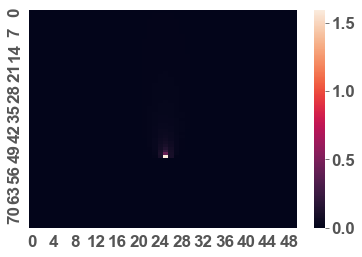

In [172]:
## Getting a heatmap of the maximum values at each point
sb.color_palette("viridis", as_cmap=True)
U_max = (np.max(U,axis = 0))
U_max = U_max[0:75,25:75]
sb.heatmap(U_max)
plt.savefig("maximums heatmap")

# Generating a plot of the max concentration halfway down the y axis vs windspeed

In [185]:
U =  np.zeros((Nt_points,Nx_points,Ny_points))
u = np.zeros((Nx_points, Ny_points))
u_old = I(x_pde,y_pde)
U[0,:,:] = u_old


max_concentrations = []
x_means = []
for x_mean in np.arange(0,5,0.5):
    U = calculate(U, x_mean, 0)
    U_sample = U[:,54,50]
    max_concentrations.append(np.max(U_sample))
    x_means.append(x_mean)

16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000


In [188]:
U =  np.zeros((Nt_points,Nx_points,Ny_points))
u = np.zeros((Nx_points, Ny_points))
u_old = I(x_pde,y_pde)
U[0,:,:] = u_old


max_concentrations = []
x_means = []
for x_mean in np.arange(0,5,0.5):
    U = calculate(U, x_mean, 0)
    U_sample = U[:,53,50]
    max_concentrations.append(np.max(U_sample))
    x_means.append(x_mean)

16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000


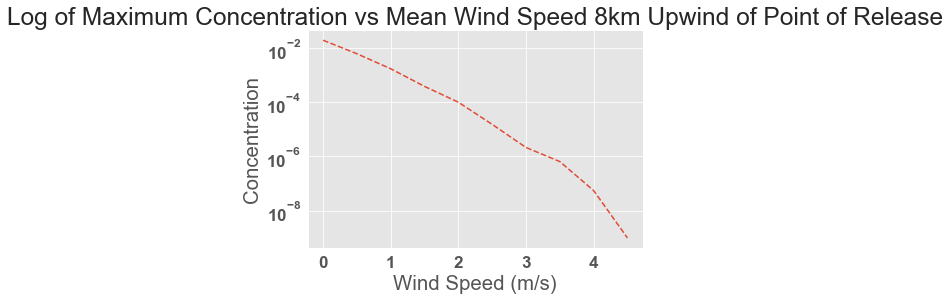

In [189]:
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 17}

matplotlib.rc('font', **font)

plt.figure(0)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Concentration')
plt.yscale('log')
# - assuming variance of 2.168835495560843 with y_mean = 0
plt.title('Log of Maximum Concentration vs Mean Wind Speed 8km Upwind of Point of Release')
plt.plot(x_means, (max_concentrations),ls='--')
plt.savefig('gg_conc_mws_x_6km_upwind.pdf',bbox_inches='tight')



# Plotting max concentration vs distance downwind

In [190]:
x_mean = 2.0046153468353722
x_std = 2.168835495560843

y_mean = 1.0209864186943514*np.exp(-16)
y_std = 2.901290755064771
#

In [198]:
max_concentrations = []
distances = []
for x_distance in np.arange(0,10,1):
    U = calculate(U, x_mean, y_mean)
    U_sample = U[:,50+x_distance,50]
    max_concentrations.append(np.max(U_sample))
    distances.append(x_distance*2)

16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000


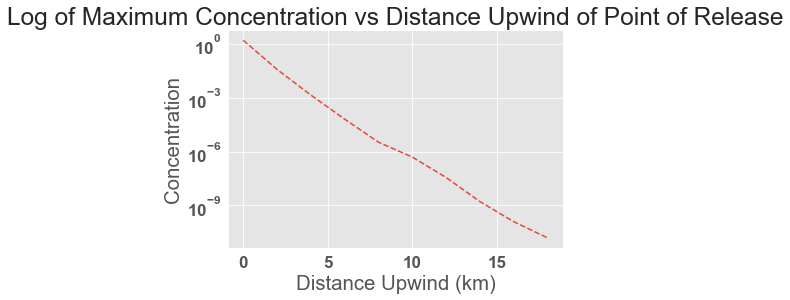

In [200]:
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 17}

matplotlib.rc('font', **font)

plt.figure(0)
plt.xlabel('Distance Upwind (km)')
plt.ylabel('Concentration')
plt.yscale('log')
# - assuming variance of 2.168835495560843 with y_mean = 0
plt.title('Log of Maximum Concentration vs Distance Upwind of Point of Release')
plt.plot(distances, (max_concentrations),ls='--')
plt.savefig('distance_up_vs_concentration.pdf',bbox_inches='tight')



# Heatmap for the report

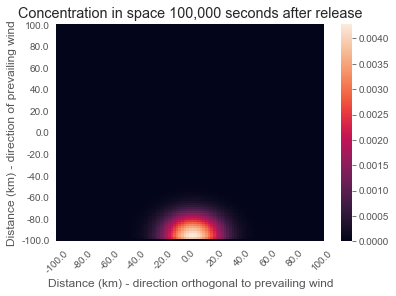

In [130]:
data = U[-1]
p = sb.heatmap(data, cbar = True, annot = False)
plt.title("Concentration in space 100,000 seconds after release")
plt.xticks(ticks, rotation = 45)
p.set_xticklabels(np.round(tick_labels,2))
plt.yticks(ticks)
p.set_yticklabels(np.round(tick_labels,2))
p.set(xlabel = "Distance (km) - direction orthogonal to prevailing wind")
p.invert_yaxis()
p.set(ylabel = "Distance (km) - direction of prevailing wind")
plt.savefig("100km after 100,000 seconds",bbox_inches='tight')

In [ ]:
U_halfway =

In [ ]:
U =  np.zeros((Nt_points,Nx_points,Ny_points))
u = np.zeros((Nx_points, Ny_points))
u_old = I(x_pde,y_pde)
U[0,:,:] = u_old

# enforcing the boundary condition
U[:,0,:]  = dir0
U[:,-1,:] = dir1

U[:,:,0] = dir0
U[:,:,-1] = dir1

print("Nt_points: ", Nt_points)
for n in range(1, Nt_points):
    if n % 100 == 0:
        print("n = ",n)
    # set Dirichlet boundary points here
    U[:,0,:]  = dir0
    U[:,-1,:] = dir1

    U[:,:,0] = dir0
    U[:,:,-1] = dir1
    # draw independent random samples for our distribution for wind speed
    Bx = wind_speed(x_mean, x_std)*dt/(2*dx)
    By = wind_speed(y_mean, y_std)*dt/(2*dx)
    # compute u at inner mesh points
    for i in range(1, Nx_points-1):
        for j in range(1,Nx_points -1):



            u[i][j] = (1-4*C)*u_old[i][j] + (C+Bx)*(u_old[i-1][j]) + (C-Bx)*(u_old[i+1][j]) +  (C+By)*(u_old[i][j-1]) + (C-By)*(u_old[i][j+1])


    # update u_old before next step
    u_old[:]= u

    # copy into full storage
    U[n,:,:] = u;


In [ ]:
sb.heatmap(U[1000])
# the second has bigger values although they start off smaller. So this is actually y = 16 but seaborn is transposing the plot!

MovieWriter ffmpeg unavailable; using Pillow instead.


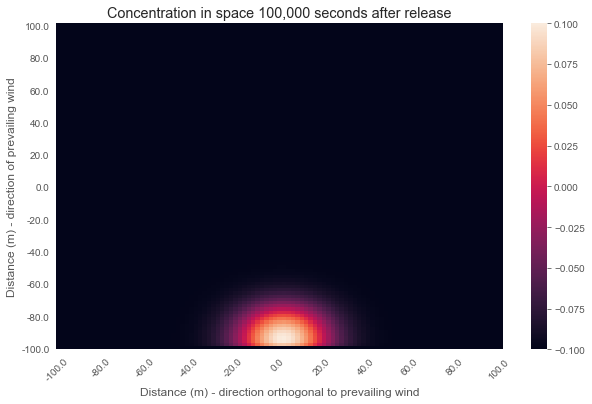

In [131]:
import seaborn as sb
import matplotlib.animation as animation

fig = plt.figure(figsize=(10,6))

n_xticks = 11
tick_labels = np.linspace(-100, 100, n_xticks)
ticks = np.linspace(0, 100, n_xticks)
def animate(i):
    data = U[i*160]

    if i == 0:
        p = sb.heatmap(data, cbar = False, annot = False)
        plt.xticks(ticks, rotation = 45)
        p.set_xticklabels(np.round(tick_labels,2))
        plt.yticks(ticks)
        plt.title("Concentration in space 100,000 seconds after release")
        p.set_yticklabels(np.round(tick_labels,2))
        p.set(xlabel = "Distance (m) - direction orthogonal to prevailing wind")
        p.invert_yaxis()
        p.set(ylabel = "Distance (m) - direction of prevailing wind")
    else:
        p = sb.heatmap(data, cbar = False, annot = False)
        plt.xticks(ticks, rotation = 45)
        p.set_xticklabels(np.round(tick_labels,2))
        plt.yticks(ticks)
        p.set_yticklabels(np.round(tick_labels,2))
        p.set(xlabel = "Distance (m) - direction orthogonal to prevailing wind")
        p.invert_yaxis()
        p.set(ylabel = "Distance (m) - direction of prevailing wind")

def init():
    p = sb.heatmap(np.zeros((Nx_points,Nx_points)), cbar=True)

ani = animation.FuncAnimation(fig, animate,init_func = init, frames=100,interval=1,repeat=True)

ani.save('animation_edit-1252.gif')

Wind speeds vs concentration (at 10 units away), in the direction of prevailing
wind

In [ ]:
def sim(x_mean,y_mean, Nt_gaps):
    Lx = 4  # final distance in x
    Ly = 4  # final distance in y
    T = 1  # final time
    Nt_points = Nt_gaps + 1
    h = T/(Nt_points)  # time step

    t = np.linspace(0.,T,Nt_points)  # times at each time step
    Nx_spaces = 2**5; # number of spaces in x direction
    Nx_points = Nx_spaces + 1
    Ny_points = Nx_points

    x_pde = np.linspace(-Lx, Lx, Nx_points)
    y_pde = np.linspace(-Ly, Ly, Nx_points)

    dx = x_pde[1] - x_pde[0]
    dt = t[1] - t[0]

    def I(x, y): # initial u(x,0):
        result = np.zeros((Nx_points, Ny_points))
        i = 0
        for x_i in x:
            j = 0
            for y_i in y:
                xy = dist.pdf([x_i,y_i])
                result[i][j] = xy
                j +=1
            i +=1
        return result

    U =  np.zeros((Nt_points,Nx_points,Ny_points))
    u = np.zeros((Nx_points, Ny_points))
    u_old = I(x_pde,y_pde)
    U[0,:,:] = u_old

    # enforcing the boundary condition
    U[:,0,:]  = dir0
    U[:,-1,:] = dir1

    U[:,:,0]  = dir0
    U[:,:,-1] = dir1


    for n in range(1, Nt_points):
        # set Dirichlet boundary points here
        #...
        # compute u at inner mesh points
        for i in range(1, Nx_points-1):
            for j in range(1,Nx_points -1):

                # draw independent random samples for our distribution for wind speed
                Bx = wind_speed(x_mean, x_std)*dt/(2*dx)
                By = wind_speed(y_mean, y_std)*dt/(2*dx)

                u[i][j] = (1-4*C)*u_old[i][j] + (C+Bx)*(u_old[i-1][j]) + (C-Bx)*(u_old[i+1][j]) +  (C+By)*(u_old[i][j-1]) + (C-By)*(u_old[i][j+1])


        # update u_old before next step
        u_old[:]= u

        # copy into full storage
        U[n,:,:] = u;
    return U

In [ ]:
# Making some plots

concentrations = []
speeds = []
y_concentrations = []
y_speeds = []
negx_concentrations = []
negx_speeds = []


# change this to include standard deviation as well
for s in range(0,31,5):
    speed = s/10
    U1 = sim(speed, 0, 2**12)
    print(speed)
    concentrations.append(U1[-1,24,16])
    speeds.append(speed)
    y_concentrations.append(U1[-1,16,24])
    y_speeds.append(speed)
    negx_concentrations.append(U1[-1,8,16])
    negx_speeds.append(speed)

# Continuous Release

In [223]:
def calculate_continuous(u, x_mean, y_mean):
    nk, ni, nj = u.shape
    print(nk-1)
    Bx = wind_speed(x_mean, x_std)*dt/(2*dx)
    By = wind_speed(y_mean, y_std)*dt/(2*dx)
    if Bx >= 0:
        Bx1 = 0
        Bx2 = -Bx
        Bx3 = Bx
    else:
        Bx1 = -Bx
        Bx2 = Bx
        Bx3 = 0

    if By >= 0:
        By1 = 0
        By2 = -By
        By3 = By
    else:
        By1 = -By
        By2 = By
        By3 = 0
    for k in range(0, nk -1):
        local_maps = np.lib.stride_tricks.sliding_window_view(u[k], (3,3))
        if k % 1000 ==0:
            print(k)
        Bx = wind_speed(x_mean, x_std)*dt/(2*dx)
        By = wind_speed(y_mean, y_std)*dt/(2*dx)
        if Bx >= 0:
            Bx1 = 0
            Bx2 = -Bx
            Bx3 = Bx
        else:
            Bx1 = -Bx
            Bx2 = Bx
            Bx3 = 0
        if By >= 0:
            By1 = 0
            By2 = -By
            By3 = By
        else:
            By1 = -By
            By2 = By
            By3 = 0
        kernel = np.array([
            [0, C+Bx1, 0],
            [C+By1, 1-(4*C)+Bx2+By2, C+By3],
            [0, C+Bx3, 0]])
        # sum the product of the kernel and each map
        # and sum each local map
        result = np.sum(kernel * local_maps, axis=(2,3))
        u[k+1, 1:-1, 1:-1] = result
        u[k+1, 50,50] += 1/nk
    return u

In [202]:
x_mean = 2.0046153468353722
x_std = 2.168835495560843

y_mean = 1.0209864186943514*np.exp(-16)
y_std = 2.901290755064771

In [ ]:

# ====== setting parameters =======
Nt_gaps = int(2**14)  # number of timesteps
Lx = 100000  # final distance in x
Ly = 100000  # final distance in y
T = 100000 # final time
Nt_points = Nt_gaps + 1
h = T/(Nt_points)  # time step

t = np.linspace(0.,T,Nt_points)  # times at each time step
Nx_spaces = 100; # number of spaces in x direction
Ny_spaces = Nx_spaces
Nx_points = Nx_spaces + 1
Ny_points = Ny_spaces + 1

x_pde = np.linspace(-Lx, Ly, Nx_points)
y_pde = np.linspace(-Lx, Ly, Ny_points)

dx = x_pde[1] - x_pde[0]
dy = y_pde[1] - x_pde[0]
dt = t[1] - t[0]

# Setting B, C and v for the numerical soultions
D = 0.208/10000
C = D*dt/(dx**2)
#vx = 5
#vy = 5
#Bx = vx*dt/(2*dx)
#By = vy*dt/(2*dx)
print("Delta x =", dx, "Delta t = ", dt, "C =", C)
print(x_mean)

In [224]:
U =  np.zeros((Nt_points,Nx_points,Ny_points))
u = np.zeros((Nx_points, Ny_points))
U = calculate_continuous(U,x_mean, y_mean)

16384
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000


<AxesSubplot:>

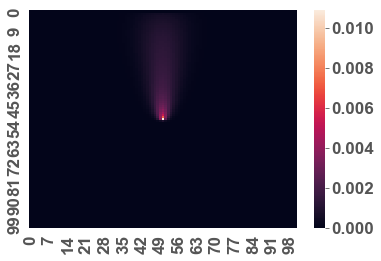

In [227]:
sb.heatmap(U[16000])

In [ ]:
fig = plt.figure(figsize=(10,6))

n_xticks = 11
tick_labels = np.linspace(-100, 100, n_xticks)
ticks = np.linspace(0, 100, n_xticks)
def animate(i):
    data = U[i*160]

    if i == 0:
        p = sb.heatmap(data, cbar = False, annot = False)
        plt.xticks(ticks, rotation = 45)
        p.set_xticklabels(np.round(tick_labels,2))
        plt.yticks(ticks)
        plt.title("Concentration in space 100,000 seconds after release")
        p.set_yticklabels(np.round(tick_labels,2))
        p.set(xlabel = "Distance (m) - direction orthogonal to prevailing wind")
        p.invert_yaxis()
        p.set(ylabel = "Distance (m) - direction of prevailing wind")
    else:
        p = sb.heatmap(data, cbar = False, annot = False)
        plt.xticks(ticks, rotation = 45)
        p.set_xticklabels(np.round(tick_labels,2))
        plt.yticks(ticks)
        p.set_yticklabels(np.round(tick_labels,2))
        p.set(xlabel = "Distance (m) - direction orthogonal to prevailing wind")
        p.invert_yaxis()
        p.set(ylabel = "Distance (m) - direction of prevailing wind")

def init():
    p = sb.heatmap(np.zeros((Nx_points,Nx_points)), cbar=True)

ani = animation.FuncAnimation(fig, animate,init_func = init, frames=100,interval=1,repeat=True)

ani.save('continuous_release.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.
